# Visualization and Analysis Scripts

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Data Statistics

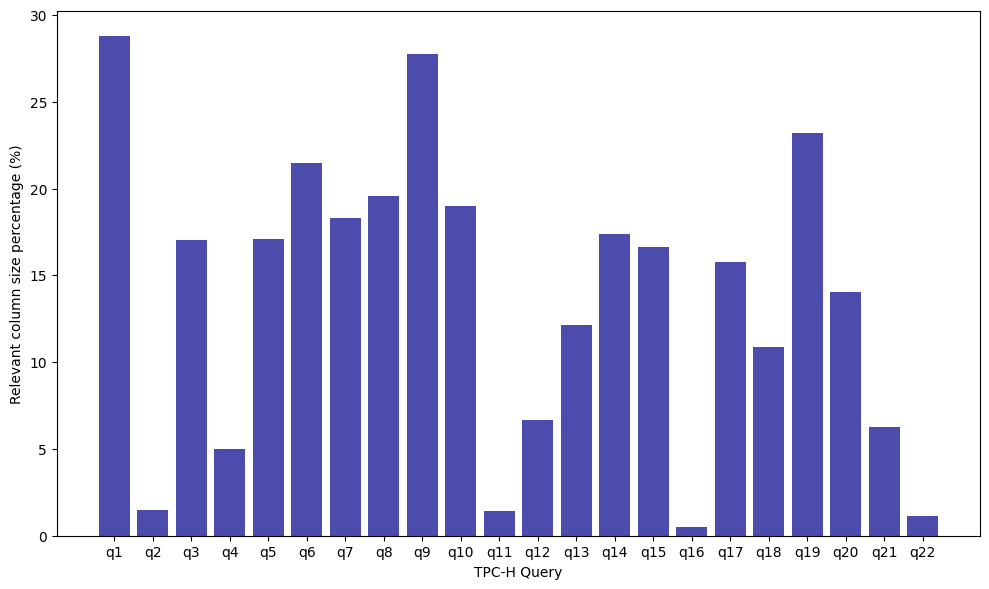

In [13]:
# 设置查询和百分比数据
queries = ['q'+str(i+1) for i in range(22)]
percentages = [28.79666889140659, 1.4719572708060051, 17.060497468586533, 4.980579900315204, 
               17.069131919348646, 21.48701494883383, 18.31107298447056, 19.57978139770934, 
               27.74155195100289, 18.99012524088393, 1.4297427787479766, 6.673514121622191, 
               12.141786416477302, 17.387274322860545, 16.622115484689825, 0.5004703076969211, 
               15.758696156242818, 10.867216187383075, 23.187125636544454, 14.032681290114388, 
               6.249143740546483, 1.1582253078428504]

# 创建柱状图
plt.figure(figsize=(10,6))
plt.bar(queries, percentages, color='darkblue', alpha=0.7)

# 设置标题和轴标签
# plt.title('The column size percentage for each query')
plt.xlabel('TPC-H Query')
plt.ylabel('Relevant column size percentage (%)')

# 显示图形
plt.tight_layout()
plt.savefig("./imgs/column_percentage.png")
plt.show()